In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfV.columns = ['Hospitalizadas', 'Curadas', 'Bajas']

In [7]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Hospitalizadas    Curadas      Bajas
Provincia Fecha                                           
Sevilla   2020-04-26        7.407407  47.712418  10.849057
          2020-05-03        5.353902  51.179941   8.510638
Total     2020-04-19        9.575758  69.532100  24.280350
          2020-04-26        5.973451  52.150193  15.307150
          2020-05-03        3.705637  45.475638   9.694323

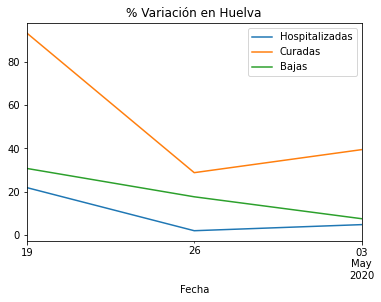

In [8]:
dfG.loc['Huelva'].plot(title='% Variación en Huelva')
plt.show()

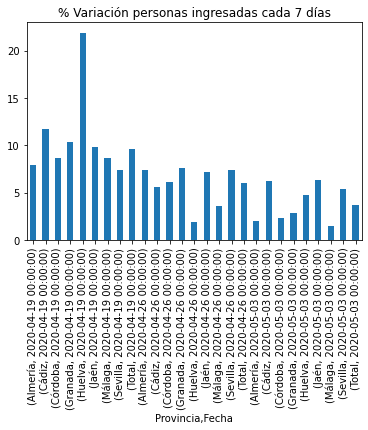

In [9]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Hospitalizadas'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [10]:
dfG.describe()

,Hospitalizadas,Curadas,Bajas
count,27.000000,27.000000,27.000000
mean,6.804946,56.378137,17.602725
std,4.076254,26.604747,9.695140
min,1.506456,12.720848,4.819277
25%,4.233771,42.474661,9.247938
50%,6.304985,52.401747,16.666667
75%,8.281908,72.834225,26.235407
max,21.893491,110.795455,34.666667


In [11]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

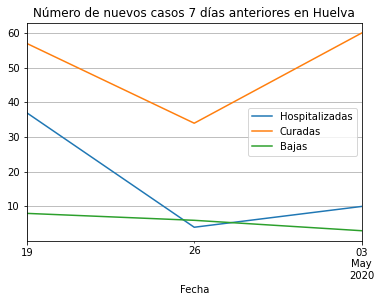

In [12]:
dfN.loc['Huelva'].plot(title='Número de nuevos casos 7 días anteriores en Huelva', grid=True)
plt.show()

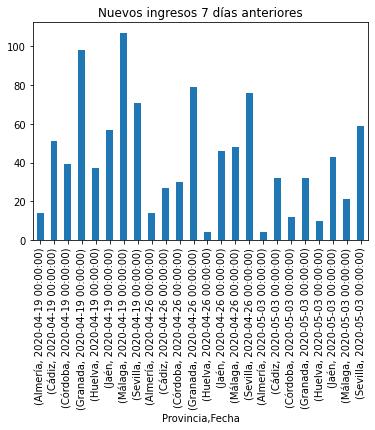

In [13]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Hospitalizadas'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

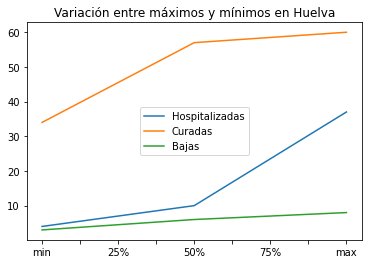

In [14]:
dfN.loc['Huelva'].describe().loc['min':'max'].plot(title='Variación entre máximos y mínimos en Huelva')
plt.show()

In [15]:
print('Nuevos casos en los 7 días anteriores')
print(dfN.sort_index())

Nuevos casos en los 7 días anteriores
                      Hospitalizadas  Curadas  Bajas
Provincia Fecha                                     
Almería   2020-04-19            14.0     62.0    6.0
          2020-04-26            14.0     82.0    3.0
          2020-05-03             4.0    120.0    4.0
Cádiz     2020-04-19            51.0     89.0   16.0
          2020-04-26            27.0     36.0   26.0
          2020-05-03            32.0     53.0   34.0
Córdoba   2020-04-19            39.0    195.0   18.0
          2020-04-26            30.0    276.0   20.0
          2020-05-03            12.0    305.0    6.0
Granada   2020-04-19            98.0    299.0   31.0
          2020-04-26            79.0    448.0   33.0
          2020-05-03            32.0    636.0   22.0
Huelva    2020-04-19            37.0     57.0    8.0
          2020-04-26             4.0     34.0    6.0
          2020-05-03            10.0     60.0    3.0
Jaén      2020-04-19            57.0     53.0   32.0
        

## Informe Huelva últimos 10 días

In [16]:
provincia = 'Huelva'
dias = 10
data = df.set_index(['Provincia', 'Fecha']).loc[provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(dias).copy()
data.columns = ['Hospitalizadas', 'Curadas', 'Bajas']
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia
# Correcciones
# Al ser datos acumulados lo que indica es una corrección en el número de ingresados acumulados a ese día
data.loc['2020-04-25']['Hospitalizadas'] = 0
data.loc['2020-04-30']['Hospitalizadas'] = 0
data.loc['2020-05-01']['Hospitalizadas'] = 0 # Aunque positiva parece relacionada con 25/04/2020

Nuevos casos en los últimos 10 días en Huelva. (Nuevos ingresos hospitalarios)


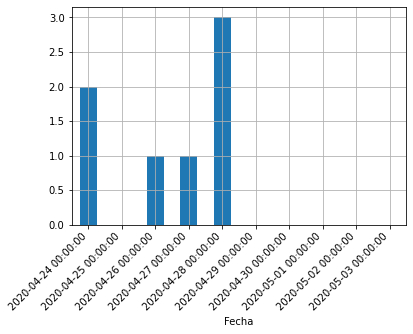

In [17]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalizadas'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

Nuevos casos en los últimos 10 días en Huelva. (Variación entre mínimos y máximos)


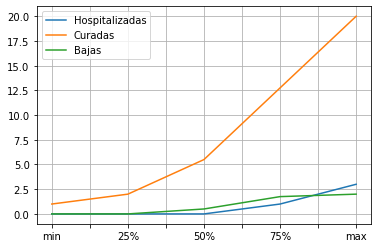

In [18]:
print(titulo + '. (Variación entre mínimos y máximos)')
data.describe().loc['min':'max'].plot(grid=True)
plt.show()

In [19]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Huelva
            Hospitalizadas  Curadas  Bajas
Fecha                                     
2020-04-24             2.0      2.0    2.0
2020-04-25             0.0     12.0    2.0
2020-04-26             1.0      2.0    1.0
2020-04-27             1.0      1.0    0.0
2020-04-28             3.0      1.0    0.0
2020-04-29             0.0      9.0    1.0
2020-04-30             0.0     20.0    2.0
2020-05-01             0.0     13.0    0.0
2020-05-02             0.0     14.0    0.0
2020-05-03             0.0      2.0    0.0


In [20]:
data.describe()

,Hospitalizadas,Curadas,Bajas
count,10.00000,10.000000,10.000000
mean,0.70000,7.600000,0.800000
std,1.05935,6.883152,0.918937
min,0.00000,1.000000,0.000000
25%,0.00000,2.000000,0.000000
50%,0.00000,5.500000,0.500000
75%,1.00000,12.750000,1.750000
max,3.00000,20.000000,2.000000
